# Lab Activity Week 6

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Push your new data to your git repository on GitHub and update the version of your respository on your laptop

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial 5 minute delay (so it should run for 10 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot all of the types of data you have (Pressure, temperature, humidity, PM2.5, etc.) as a time series (value vs time stamp)
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by any of the probability distributions we have learned about?
  - For example, using the mean and standard deviation, try plotting a Gaussian funciton along with each of your frequency distributions and see how well they match.

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?

In [57]:
import math
import numpy as np
import pandas as pd
# This line allows plots to show in the Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import io
from scipy.stats import norm
import requests

In [3]:
data = pd.read_csv('/Users/srajadnya/Desktop/engin11/E11-Labwork/1630712128.csv')

In [52]:
data.describe()

,Temperature,Pressure,Relative_Humidity,Air_Quality_PM1,Air_Quality_PM2.5,Air_Quality_PM10,Timestamp
count,266.000000,266.000000,266.000000,266.0,266.0,266.0,266.000000
mean,95.372523,1002.340722,19.759098,1.0,2.0,3.0,150.093985
std,2.659555,0.028566,1.737347,0.0,0.0,0.0,86.783588
min,89.509000,1002.281000,17.625000,1.0,2.0,3.0,1.000000
25%,93.254500,1002.321000,18.355250,1.0,2.0,3.0,75.250000
50%,96.202000,1002.340500,19.309000,1.0,2.0,3.0,150.500000
75%,97.675750,1002.361000,20.806250,1.0,2.0,3.0,224.750000
max,98.457000,1002.422000,23.793000,1.0,2.0,3.0,300.000000


In [26]:
temp_data = data.loc[:,"Temperature"]
pressure_data = data.loc[:," Pressure"]
humid_data = data.loc[:,' Relative_Humidity']
aq1_data = data.loc[:, ' Air_Quality_PM1']
aq2_data = data.loc[:,' Air_Quality_PM2.5']
aq10_data = data.loc[:,' Air_Quality_PM10']

# pressure_data
# humid_data
# temp_data

In [32]:
pressure_data

0      1002.334
1      1002.324
2      1002.404
3      1002.332
4      1002.316
         ...   
261    1002.296
262    1002.342
263    1002.307
264    1002.297
265    1002.292
Name:  Pressure, Length: 266, dtype: float64

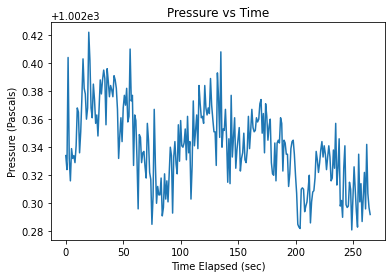

In [40]:
plt.plot(pressure_data)
plt.ylabel("Pressure (Pascals)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Pressure vs Time")
plt.show()

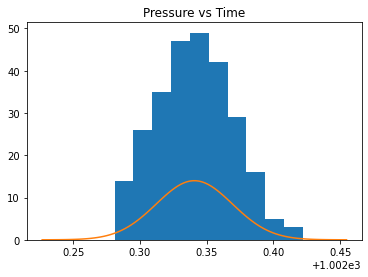

In [67]:
plt.hist(pressure_data)
# plt.ylabel("Pressure (Pascals)")
# plt.xlabel("Time Elapsed (sec)")
plt.title("Pressure vs Time")

mean = np.mean(pressure_data)
std = np.std(pressure_data)

x = np.linspace(mean - 4*std, mean + 4*std, 100)
plt.plot(x, norm.pdf(x, mean, std))

plt.show()


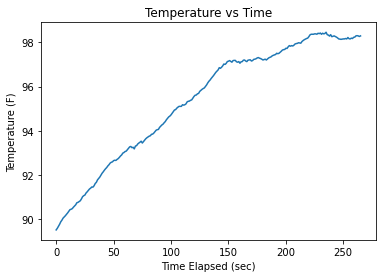

In [9]:
plt.plot(temp_data)
plt.ylabel("Temperature (F)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Temperature vs Time")
plt.show()

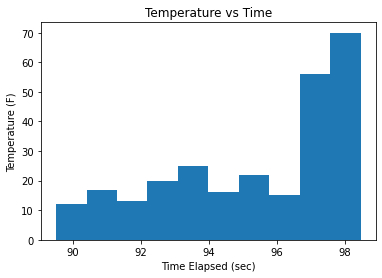

In [47]:
plt.hist(temp_data)
plt.ylabel("Temperature (F)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Temperature vs Time")
plt.show()

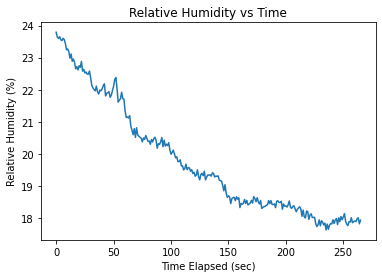

In [48]:
plt.plot(humid_data)
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Relative Humidity vs Time")
plt.show()

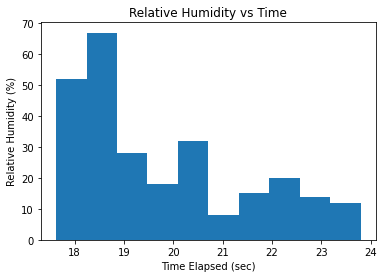

In [69]:
plt.hist(humid_data)
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Relative Humidity vs Time")
plt.show()

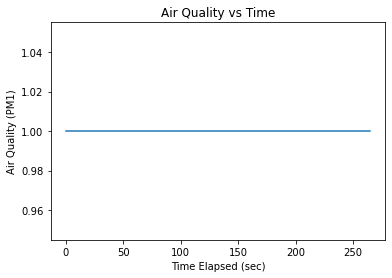

In [42]:
plt.plot(aq1_data)
plt.ylabel("Air Quality (PM1)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Air Quality vs Time")
plt.show()

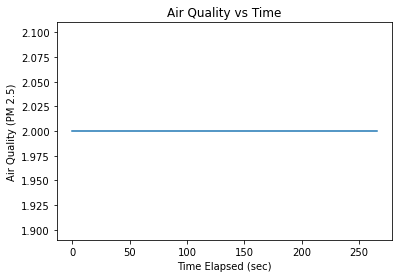

In [44]:
plt.plot(aq2_data)
plt.ylabel("Air Quality (PM 2.5)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Air Quality vs Time")
plt.show()

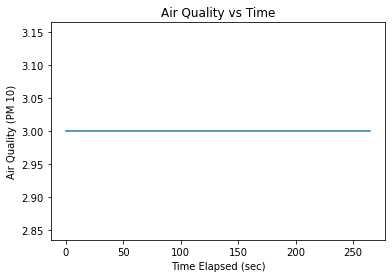

In [45]:
plt.plot(aq10_data)
plt.ylabel("Air Quality (PM 10)")
plt.xlabel("Time Elapsed (sec)")
plt.title("Air Quality vs Time")
plt.show()

### Homework:
- Finish up any plotting you didn't complete during lab